In [1]:
import os
os.chdir(r'C:\Users\82107\Desktop\Study\ML learning')
print('current directory:', os.getcwd())

current directory: C:\Users\82107\Desktop\Study\ML learning


In [10]:
import numpy as np
np.random.seed(1)
p = 2
lambda_v = 1.5  #tuning parameter를 1.5로 정함
true_beta = np.array([[1], [-0.5]])
n = 10

# predictor 생성
x = np.random.normal(0, 1, (n, p))
# 확률값을 계산하고 binomial 분포를 이용해 y를 생성
prob = 1 / (1 + np.exp(- x @ true_beta))
prob = prob.reshape((n,))
prob 

array([0.87327416, 0.50207813, 0.88248512, 0.89334897, 0.60914609,
       0.92359167, 0.4674486 , 0.84339584, 0.56623371, 0.43802193])

In [11]:
tmpN = np.ones(n, dtype='int32')
y = np.random.binomial(tmpN, prob, n)
y = y.reshape((n,1))
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [14]:
beta = np.array([.5,.5]).reshape((p,1))
prob = 1 / (1 + np.exp(- x @ beta))
# 1차 미분
grad = np.mean((prob - y) * x, axis=0, keepdims=True).T + 2*lambda_v*beta
# 2차 미분
D = np.diag((prob * (1 - prob)).reshape(n))
D[:5, :5]

array([[0.23463952, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.21386334, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.22035374, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.23547229, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.24992418]])

In [13]:
H = x.T @ D @ x/n + np.diag(np.repeat(2*lambda_v,p))
H

array([[ 3.24626658, -0.18603102],
       [-0.18603102,  3.32919247]])

In [18]:
# initial beta
beta = np.zeros((p, 1))
for i in range(10):
    # 확률, 1차와 2차 미분 계산
    prob = 1 / (1 + np.exp(- x @ beta))
    grad = np.mean((prob - y) * x, axis=0, keepdims=True).T + 2*lambda_v*beta
    D = np.diag((prob * (1 - prob)).reshape(n))
    H = x.T @ D @ x/n + np.diag(np.repeat(2*lambda_v,p))
    
    # beta update
    beta_new = beta - np.linalg.inv(H) @ grad
    
    # stopping rule
    if np.sum(np.abs(beta_new - beta)) < 1e-8:
        beta = beta_new
        print('Iteration {} beta:'.format(i+1))
        print(beta, '\n')
        break
    else:
        beta = beta_new
        print('Iteration {} beta:'.format(i+1))
        print(beta, '\n')

Iteration 1 beta:
[[ 0.0870686 ]
 [-0.12665486]] 

Iteration 2 beta:
[[ 0.08717758]
 [-0.126814  ]] 

Iteration 3 beta:
[[ 0.08717758]
 [-0.126814  ]] 



In [20]:
# lasso, ridge linear regression
# 행렬을 다루기 위한 모듈을 불러온다.
import numpy as np
# 시각화를 위한 모듈을 불러온다.
import matplotlib.pyplot as plt
# Ridge와 Lasso를 사용하기위한 모듈을 불러온다.
from sklearn.linear_model import lasso_path, Lasso, Ridge

# 조율모수(lambda_v) 값 설정
n_lambdas = 50
lambda_vec = np.linspace(0,100, n_lambdas)
# 각 alpha 값에 대하여 Ridge penalty regression 적합(solution path)
coefs = []
for lambda_v in lambda_vec:
    ridge = Ridge(alpha=lambda_v, fit_intercept=False) #intercept가 False라는 것은 상수항은 고려하지 않겠다는 의미(데이터셋에 상수항이 있으면 False로 설정)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
coefs = np.squeeze(np.array(coefs))
coefs[:6, :]

array([[ 0.21586603, -0.50474677],
       [ 0.22209361, -0.43823646],
       [ 0.21563897, -0.39200335],
       [ 0.20577604, -0.35637417],
       [ 0.19525398, -0.32748458],
       [ 0.18502436, -0.30333821]])

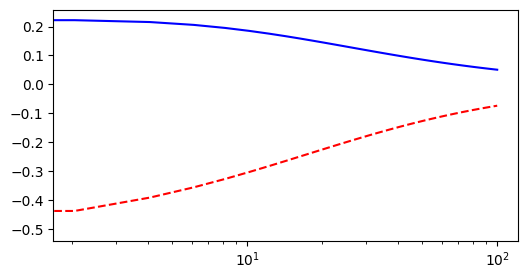

In [21]:
# solution path 시각화
plt.figure(figsize=(6, 3))
colors = ['b', 'r', 'g']
lstyles = ['-', '--', '-.', ':']
for i in range(p):
    l = plt.plot(lambda_vec, coefs[:, i],   #X축에는 lambda_vec(튜닝 파라미터), Y축에는 I번째 회귀계수의 값
                 linestyle=lstyles[i], c=colors[i])
plt.xscale('log')
plt.axis('tight')
plt.show()
#Tuning parameter가 커져감에 따라 ridge 회귀분석으로 추정된 회귀계수값이 0쪽으로 모인다는 의미